In [22]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from datetime import datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassenger.csv',parse_dates = True, index_col = 'Year-Month' )

In [3]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


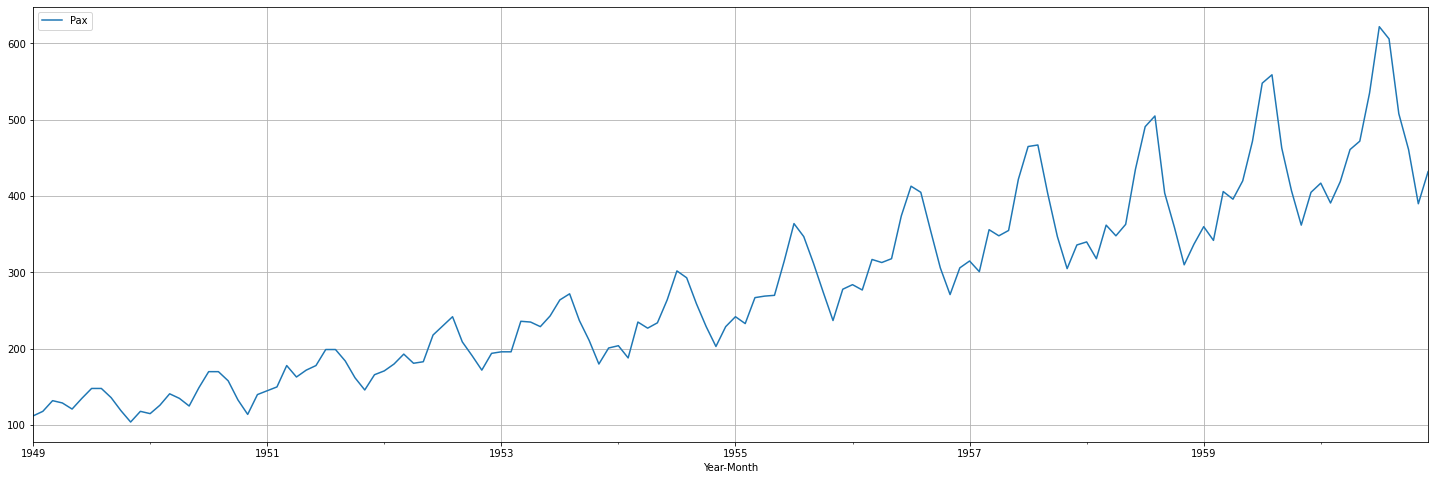

In [4]:
plt.rcParams['figure.figsize'] = 25,8
df.plot()
plt.grid();


In [5]:
len(df)

144

In [6]:
144*(80/100)

115.2

In [7]:
train = df[:116]
test = df[116:]

In [8]:
len(train),len(test)

(116, 28)

In [9]:
train.tail()

,Pax
Year-Month,
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505


In [10]:
test.head()

,Pax
Year-Month,
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360


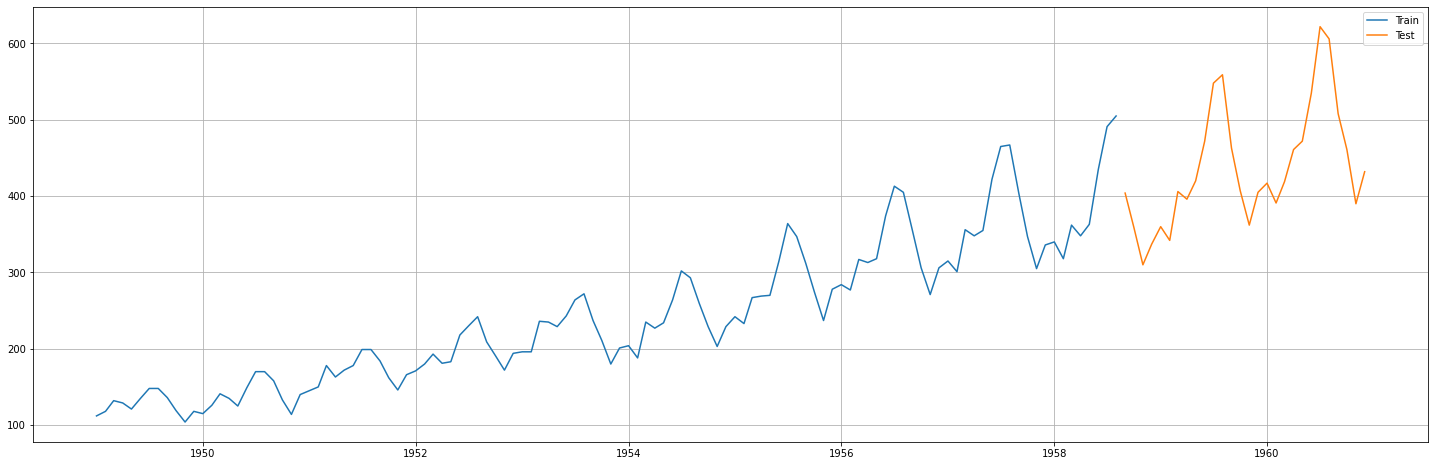

In [11]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.legend(loc = 'best')
plt.grid();

# Triple Exponential Smoothing

In [12]:
model = ExponentialSmoothing(train,trend = 'additive', seasonal = 'additive', initialization_method = 'estimated').fit(optimized = True)

In [13]:
model.summary()

Dep. Variable:,Pax,No. Observations:,116
Model:,ExponentialSmoothing,SSE,15724.650
Optimized:,True,AIC,601.490
Trend:,Additive,BIC,645.547
Seasonal:,Additive,AICC,608.541
Seasonal Periods:,12,Date:,"Sat, 27 Nov 2021"
Box-Cox:,False,Time:,07:38:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2396668,alpha,True
smoothing_trend,3.1101e-07,beta,True


In [14]:
pred = model.forecast(steps = len(test))

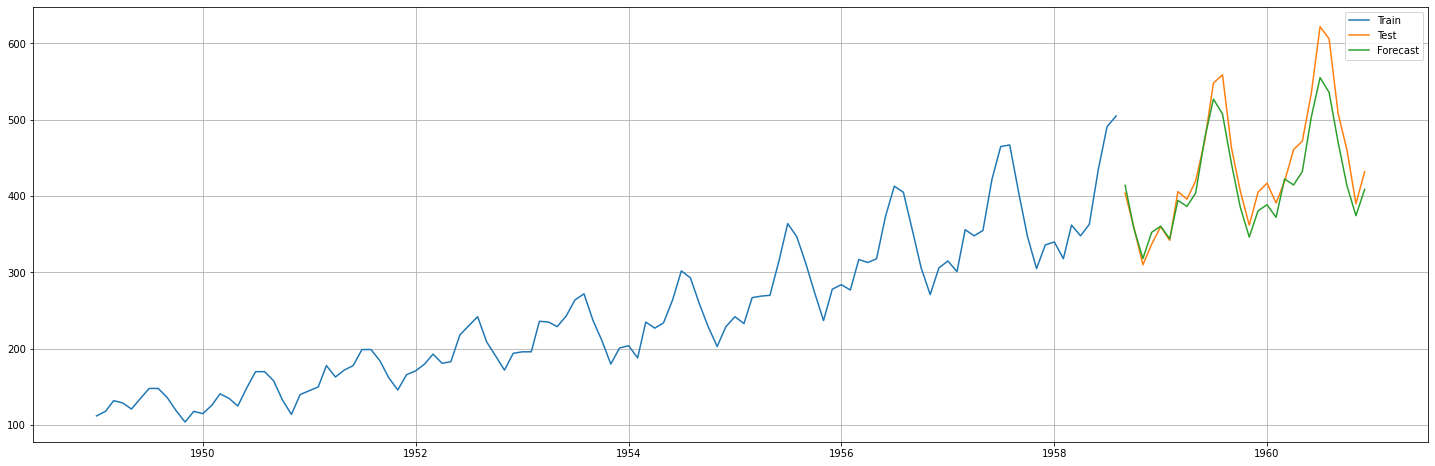

In [15]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Forecast')
plt.legend(loc = 'best')
plt.grid();

In [16]:
mean_squared_error(test.values,pred.values)

906.1184234535036

In [17]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [18]:
MAPE(test['Pax'],pred)

4.994325867437864

# Forecasting using Multiplicative Model

In [19]:
model = ExponentialSmoothing(train,trend = 'multiplicative', seasonal = 'multiplicative', initialization_method = 'estimated').fit(optimized = True)

In [20]:
model.summary()

Dep. Variable:,Pax,No. Observations:,116
Model:,ExponentialSmoothing,SSE,10336.896
Optimized:,True,AIC,552.827
Trend:,Multiplicative,BIC,596.884
Seasonal:,Multiplicative,AICC,559.878
Seasonal Periods:,12,Date:,"Sat, 27 Nov 2021"
Box-Cox:,False,Time:,07:39:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3853426,alpha,True
smoothing_trend,5.3238e-09,beta,True


In [21]:
pred = model.forecast(steps = len(test))

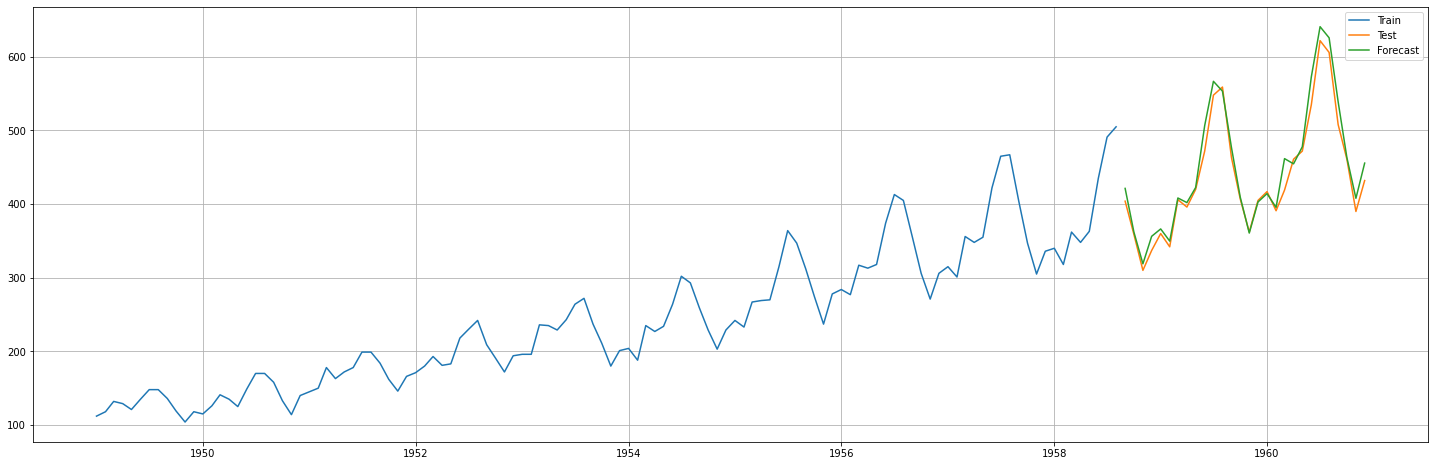

In [22]:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Forecast')
plt.legend(loc = 'best')
plt.grid();

In [23]:
mean_squared_error(test.values,pred.values)

309.1018269234176

In [24]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [25]:
MAPE(test['Pax'],pred)

2.9046457765278424

# Applying on Entire Data

In [26]:
model = ExponentialSmoothing(df,trend = 'multiplicative', seasonal = 'multiplicative', initialization_method = 'estimated').fit(optimized = True)

In [27]:
model.summary()

Dep. Variable:,Pax,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.297
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Sat, 27 Nov 2021"
Box-Cox:,False,Time:,07:42:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2919062,alpha,True
smoothing_trend,8.0534e-10,beta,True


In [31]:
pred = model.forecast(24)

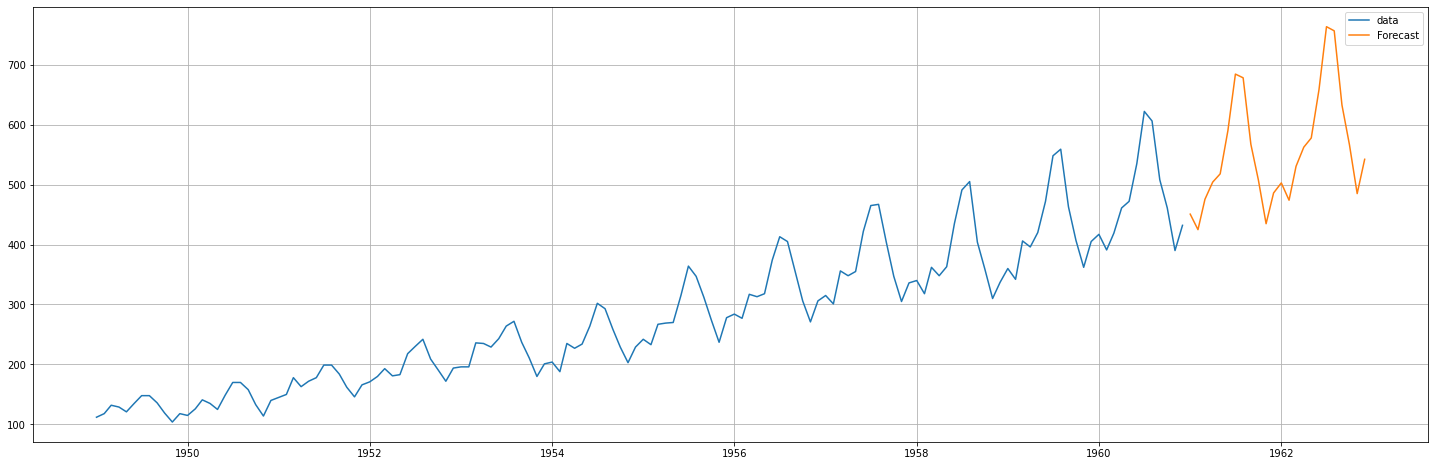

In [32]:
plt.plot(df, label = 'data')
plt.plot(pred, label = 'Forecast')
plt.legend(loc = 'best')
plt.grid();